http://codewithmax.com/2017/09/21/machine-learning-programming-exercise-1-linear-regression/

# ques 1 (warmup excercise)

In [64]:
import numpy as np
def WarmUpExcercise():
    a = []
    a = np.eye(5,5)
    return a

WarmUpExcercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

another way 

In [65]:
def WarmUpExcercise():
    a =np.arange(0,25).reshape(5,5)
    for i in range(0,5):
        for j in range(0,5):
            if(i == j):
                a[i][j]=1
            else:
                a[i][j]=0
    return a

WarmUpExcercise()

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [66]:
data = np.loadtxt('ex1data1.txt', delimiter=',')
x,y = data[:,0],data[:,1]
m = y.size
m

97

In [67]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

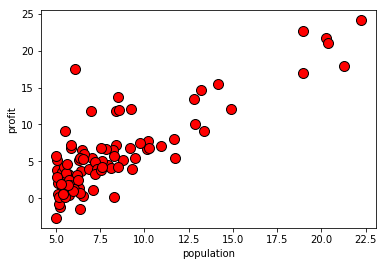

In [68]:
def plotData(x,y):
    pyplot.plot(x,y,'ro',ms =10,mec='k')
    pyplot.xlabel('population')
    pyplot.ylabel('profit')

plotData(x,y)

In [69]:

X = np.stack([np.ones(m),x],axis=1)

In [70]:
def computeCost(x,y,theta):
    m = y.size
    j=0
    yhat=X.dot(theta)
    j=(np.sum(np.square(yhat-y)))/(2*m)
    return j

computeCost(X,y, theta = np.array([0.0,0.0]))

32.072733877455676

In [71]:
computeCost(X, y, theta=np.array([-1, 2]))

54.24245508201238

# gradient descent 


In [72]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m = y.size
    j_history = np.zeros(num_iters)
    
    for iters in np.arange(num_iters):
        h = X.dot(theta)
        theta-=alpha*(1/m)*(X.T.dot(h-y))
        j_history[iters] = computeCost(X,y,theta)
    return (theta,j_history)

In [73]:
theta = np.zeros(2)
alpha = 0.01
iterations = 1500
theta ,j_history = gradientDescent(X,y,theta,alpha,iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


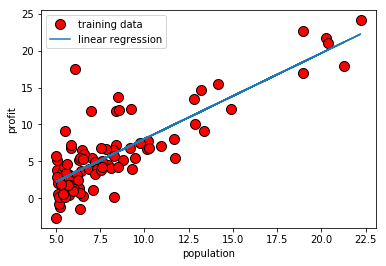

In [74]:
plotData(X[:,1],y)
pyplot.plot(X[:,1],np.dot(X,theta),'-')
pyplot.legend(['training data ','linear regression'])

In [75]:
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



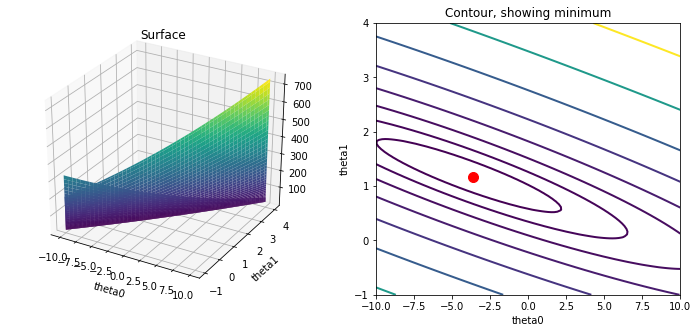

In [76]:
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
J_vals = np.zeros((theta0_vals.shape[0],theta1_vals.shape[0]))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')

pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')


ax = pyplot.subplot(122)
pyplot.contour(theta0_vals,theta1_vals,J_vals,linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')
pass

# normal equation

In [133]:
def normalEqn(X,y):
    return np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
data = np.loadtxt('ex1data2.txt',delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

# X = np.ones((len(x),3))
# len(X)
# X = X[:, 1:] 
# print(X)
# np.linalg.inv(np.dot(X.T,X))
t = normalEqn(X,y)
print(t)
params = np.array([1, 1650]) 

predict = np.dot(t, params)
print ('A 3 bedroom / 1650 sqft house will cost $%0.2f' % predict)

[  140.86108621 16978.19105903]
A 3 bedroom / 1650 sqft house will cost $28014156.11


# feature scaling

In [77]:
data = np.loadtxt('ex1data2.txt',delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

In [78]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = np.divide((X-mu),sigma)
    return X_norm,mu,sigma

X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)


Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


In [79]:
# X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
theta

array([-3.63029144,  1.16636235])

In [80]:
def computeCostMulti(X,y,theta):
    m = y.shape[0]
    j=0
    
    d = X.dot(theta)
    
    j = (1/(2*m))*np.power((d-y),2)
    
    return j

# computeCostMulti(X_norm,y,theta)


In [81]:
def gradientDescentMulti(X,y,theta,alpa,num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for iters in np.arange(num_iters):
        h = X.dot(theta)
        theta-=alpha*(1/m)*(X.T.dot(h-y))
        J_history.append(computeCostMulti(X,y,theta))
    return theta , J_history
# t,j = gradientDescentMulti(X,y,theta,0.8,34)


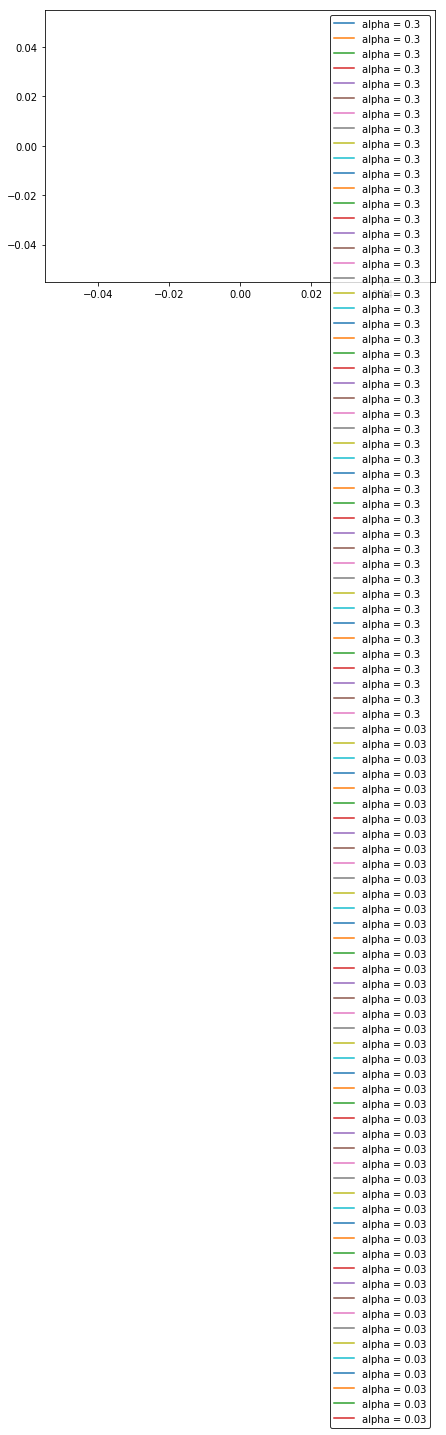

In [88]:
# import matplotlib.pyplot as plt
# learningRates = [0.3,0.03]
# fig ,ax = plt.subplots(figsize =(7,5))
# # theta = np.zeros(3)
# for alpha in learningRates:
#     th,j = gradientDescentMulti(X,y,theta,alpha,50)
#     ax.plot(j,label ='alpha = {}'.format(alpha))

# #theta value not miling 
# pst = plt.legend(loc='best', frameon=True)
# pst.get_frame().set_edgecolor('k');
# # theta

[3.27178862e+10 1.71259835e+10 9.58680455e+09 5.88706267e+09
 4.04693694e+09 3.11821225e+09 2.64089913e+09 2.38973823e+09
 2.25350433e+09 2.17678917e+09 2.13168252e+09 2.10391414e+09
 2.08603779e+09 2.07406117e+09 2.06576869e+09 2.05987914e+09
 2.05561736e+09 2.05249247e+09 2.05018028e+09 2.04845890e+09
 2.04717212e+09 2.04620760e+09 2.04548335e+09 2.04493889e+09
 2.04452927e+09 2.04422095e+09 2.04398879e+09 2.04381396e+09
 2.04368227e+09 2.04358307e+09 2.04350834e+09 2.04345204e+09
 2.04340963e+09 2.04337767e+09 2.04335360e+09 2.04333546e+09
 2.04332180e+09 2.04331150e+09 2.04330375e+09 2.04329790e+09
 2.04329350e+09 2.04329018e+09 2.04328769e+09 2.04328580e+09
 2.04328438e+09 2.04328332e+09 2.04328251e+09 2.04328190e+09
 2.04328145e+09 2.04328110e+09]
[2.04328101e+09 2.04328093e+09 2.04328085e+09 2.04328078e+09
 2.04328072e+09 2.04328066e+09 2.04328061e+09 2.04328056e+09
 2.04328052e+09 2.04328048e+09 2.04328044e+09 2.04328041e+09
 2.04328038e+09 2.04328035e+09 2.04328032e+09 2.04328

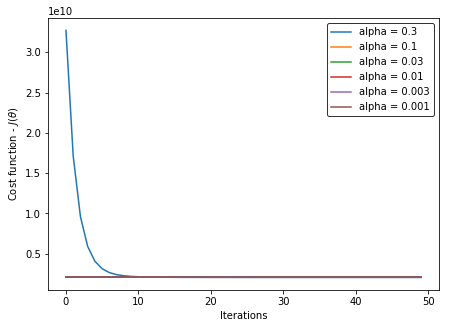

In [132]:
import sys
learningRates = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]

fig, ax = plt.subplots(figsize=(7, 5))
data = np.loadtxt('ex1data2.txt',delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.shape[0]
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
theta = np.zeros(3)
# print(X,y,theta)
for alpha in learningRates:
    gradientNew, costNew = gradientDescent(X, y, theta, alpha, 50) 
    print(costNew)
    ax.plot(costNew, label='alpha = {0}'.format(alpha))
    

ax.set_ylabel(r"Cost function - $J(\theta)$")
ax.set_xlabel('Iterations')
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');

# different rates of aplha milena

In [106]:
def normalEqn(X,y):
    return np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))
data = np.loadtxt('ex1data2.txt',delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

# X = np.ones((len(x),3))
# len(X)
# X = X[:, 1:] 
# print(X)
# np.linalg.inv(np.dot(X.T,X))
t = normalEqn(X,y)
print(t)
params = np.array([1, 1650]) 

predict = np.dot(t, params)
print ('A 3 bedroom / 1650 sqft house will cost $%0.2f' % predict)

array([  140.86108621, 16978.19105903])

In [109]:
params = np.array([1, 1650]) 

predict = np.dot(t, params)
print ('A 3 bedroom / 1650 sqft house will cost $%0.2f' % predict)

A 3 bedroom / 1650 sqft house will cost $28014156.11
